In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gas=pd.read_csv('gas_turbines.csv')
gas

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [3]:
gas.shape

(15039, 11)

In [4]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:>

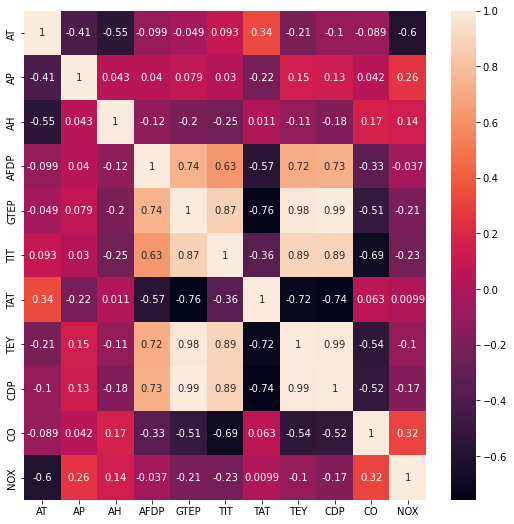

In [6]:
corr = gas.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


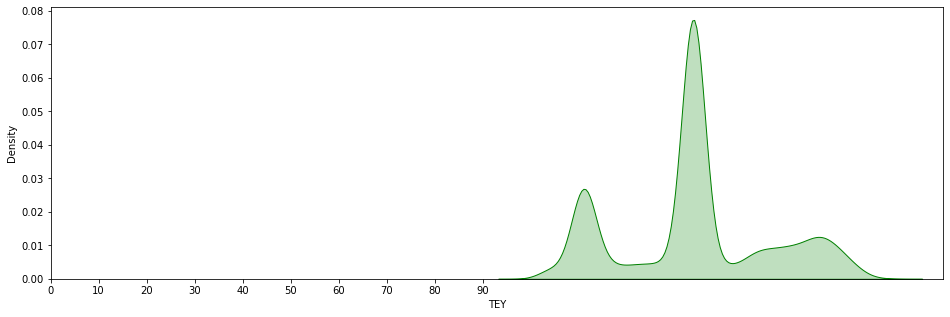

In [7]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(gas['TEY'].skew()))
print("Kurtosis: {}".format(gas['TEY'].kurtosis()))
ax = sns.kdeplot(gas['TEY'],shade=True,color='g')
plt.xticks([i for i in range(0,100,10)])
plt.show()

In [8]:
num_columns = gas.select_dtypes(exclude='object').columns.tolist()

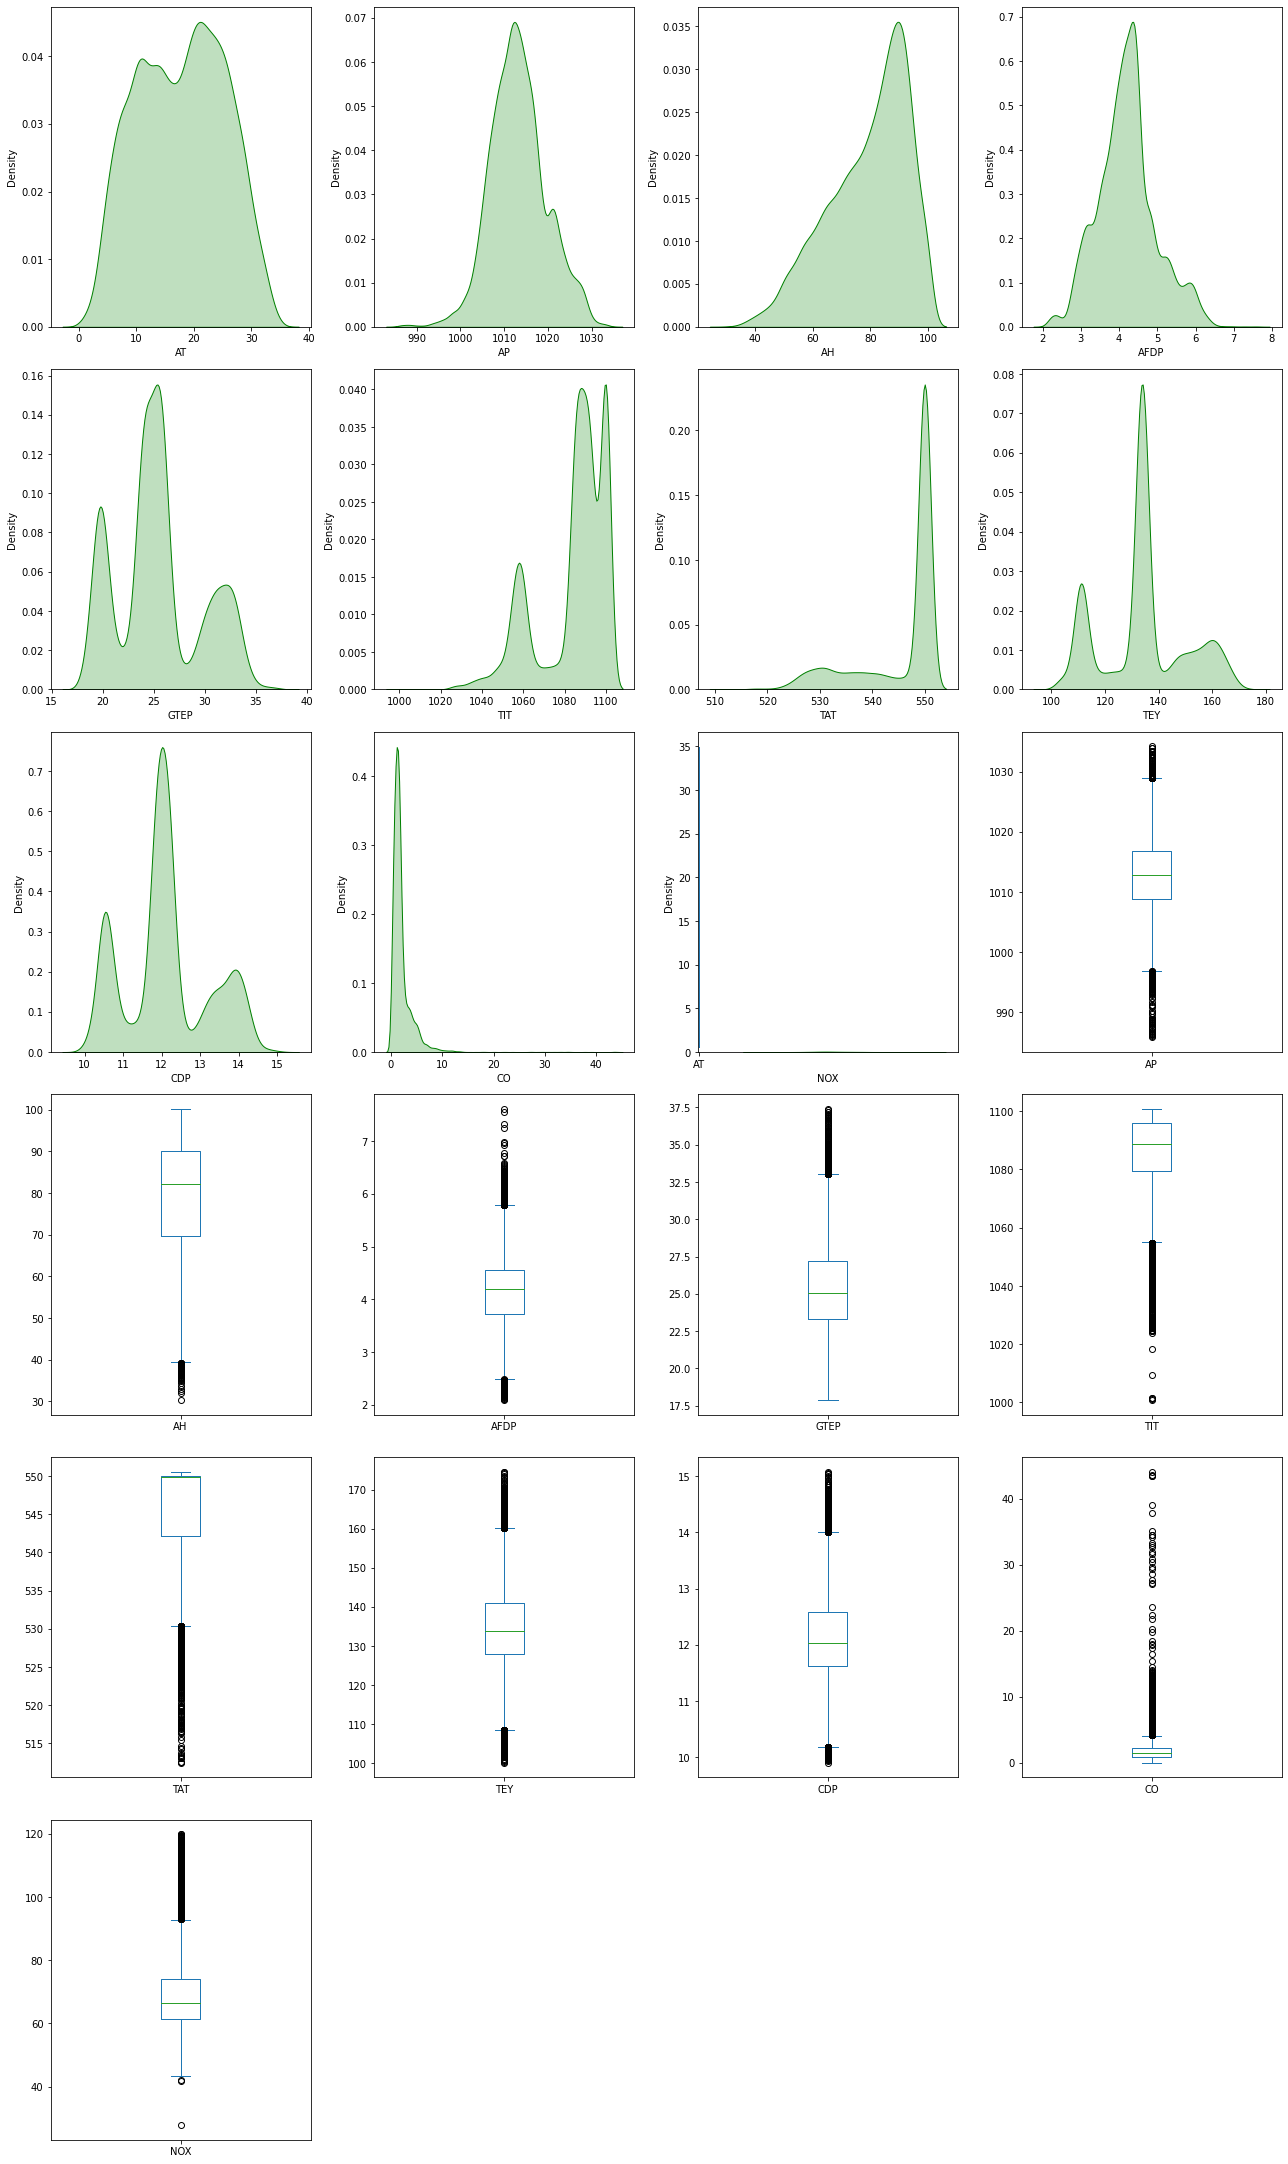

AT        AP        AH      AFDP      GTEP       TIT  \
skewness -0.030710  0.107601 -0.681224  0.315150  0.370987 -1.133744   
kurtosis -0.987597  0.424070 -0.282476  0.281642 -0.618358  0.375232   

               TAT       TEY       CDP         CO       NOX  
skewness -1.485524  0.145963  0.263042   6.534577  1.126605  
kurtosis  0.847637 -0.487058 -0.589420  82.518116  2.660381

In [9]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gas[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    gas[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = gas[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [10]:
x = gas.drop(labels='TEY',axis=1)
y = gas['TEY']

In [11]:
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
scaled_x = stdsclr.fit_transform(x)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [15]:
ann = models.Sequential([
      layers.Dense(20,input_dim=10,activation = 'relu'),
      layers.Dense(40,activation = 'relu'),
      layers.Dense(1,activation = 'linear')
    
])

In [16]:
ann.compile(optimizer='adam',loss='mse',metrics=["mse","mae"])

In [17]:
ann.fit(x,y,batch_size=100,epochs=300)

Epoch 1/300
151/151 [==============================] - 1s 3ms/step - loss: 298.2162 - mse: 298.2162 - mae: 12.4717
Epoch 2/300
151/151 [==============================] - 0s 3ms/step - loss: 153.8047 - mse: 153.8047 - mae: 9.1365
Epoch 3/300
151/151 [==============================] - 0s 3ms/step - loss: 111.2529 - mse: 111.2529 - mae: 7.8865
Epoch 4/300
151/151 [==============================] - 0s 3ms/step - loss: 65.4248 - mse: 65.4248 - mae: 6.1098
Epoch 5/300
151/151 [==============================] - 0s 3ms/step - loss: 33.3800 - mse: 33.3800 - mae: 4.3225
Epoch 6/300
151/151 [==============================] - 0s 3ms/step - loss: 17.9076 - mse: 17.9076 - mae: 3.0638
Epoch 7/300
151/151 [==============================] - 0s 3ms/step - loss: 12.7287 - mse: 12.7287 - mae: 2.6018
Epoch 8/300
151/151 [==============================] - 1s 3ms/step - loss: 9.1188 - mse: 9.1188 - mae: 2.2082
Epoch 9/300
151/151 [==============================] - 0s 2ms/step - loss: 7.0212 - mse: 7.0212 - m

151/151 [==============================] - 0s 3ms/step - loss: 1.5101 - mse: 1.5101 - mae: 0.9623
Epoch 75/300
151/151 [==============================] - 0s 3ms/step - loss: 1.3269 - mse: 1.3269 - mae: 0.9016
Epoch 76/300
151/151 [==============================] - 0s 3ms/step - loss: 1.4803 - mse: 1.4803 - mae: 0.9554
Epoch 77/300
151/151 [==============================] - 0s 3ms/step - loss: 1.3702 - mse: 1.3702 - mae: 0.9196
Epoch 78/300
151/151 [==============================] - 0s 3ms/step - loss: 1.2086 - mse: 1.2086 - mae: 0.8544
Epoch 79/300
151/151 [==============================] - 0s 3ms/step - loss: 1.3857 - mse: 1.3857 - mae: 0.9231
Epoch 80/300
151/151 [==============================] - 0s 3ms/step - loss: 1.4850 - mse: 1.4850 - mae: 0.9582
Epoch 81/300
151/151 [==============================] - 0s 2ms/step - loss: 1.8509 - mse: 1.8509 - mae: 1.0739
Epoch 82/300
151/151 [==============================] - 0s 3ms/step - loss: 1.3703 - mse: 1.3703 - mae: 0.9103
Epoch 83/300
1

151/151 [==============================] - 0s 3ms/step - loss: 1.0639 - mse: 1.0639 - mae: 0.8013
Epoch 148/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9821 - mse: 0.9821 - mae: 0.7704
Epoch 149/300
151/151 [==============================] - 0s 3ms/step - loss: 0.8721 - mse: 0.8721 - mae: 0.7082
Epoch 150/300
151/151 [==============================] - 0s 3ms/step - loss: 0.8852 - mse: 0.8852 - mae: 0.7182
Epoch 151/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9198 - mse: 0.9198 - mae: 0.7330
Epoch 152/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9038 - mse: 0.9038 - mae: 0.7248
Epoch 153/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9555 - mse: 0.9555 - mae: 0.7561
Epoch 154/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9108 - mse: 0.9108 - mae: 0.7284
Epoch 155/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9780 - mse: 0.9780 - mae: 0.7600
Epoch 

151/151 [==============================] - 0s 3ms/step - loss: 0.8222 - mse: 0.8222 - mae: 0.6820
Epoch 221/300
151/151 [==============================] - 0s 3ms/step - loss: 0.8102 - mse: 0.8102 - mae: 0.6790
Epoch 222/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9620 - mse: 0.9620 - mae: 0.7525
Epoch 223/300
151/151 [==============================] - 0s 3ms/step - loss: 1.0746 - mse: 1.0746 - mae: 0.8074
Epoch 224/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9714 - mse: 0.9714 - mae: 0.7558
Epoch 225/300
151/151 [==============================] - 0s 3ms/step - loss: 1.0879 - mse: 1.0879 - mae: 0.8078
Epoch 226/300
151/151 [==============================] - 0s 3ms/step - loss: 0.7196 - mse: 0.7196 - mae: 0.6294
Epoch 227/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9470 - mse: 0.9470 - mae: 0.7562
Epoch 228/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9165 - mse: 0.9165 - mae: 0.7354
Epoch 

151/151 [==============================] - 0s 3ms/step - loss: 0.9646 - mse: 0.9646 - mae: 0.7432
Epoch 294/300
151/151 [==============================] - 0s 3ms/step - loss: 0.8696 - mse: 0.8696 - mae: 0.7115
Epoch 295/300
151/151 [==============================] - 0s 3ms/step - loss: 0.7972 - mse: 0.7972 - mae: 0.6761
Epoch 296/300
151/151 [==============================] - 0s 2ms/step - loss: 0.8939 - mse: 0.8939 - mae: 0.7246
Epoch 297/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9378 - mse: 0.9378 - mae: 0.7449
Epoch 298/300
151/151 [==============================] - 0s 3ms/step - loss: 0.7986 - mse: 0.7986 - mae: 0.6749
Epoch 299/300
151/151 [==============================] - 0s 3ms/step - loss: 0.9683 - mse: 0.9683 - mae: 0.7654
Epoch 300/300
151/151 [==============================] - 0s 3ms/step - loss: 0.8809 - mse: 0.8809 - mae: 0.7137


In [18]:
ann.evaluate(x,y)

470/470 [==============================] - 1s 2ms/step - loss: 1.4065 - mse: 1.4065 - mae: 1.0122


[1.4065231084823608, 1.4065231084823608, 1.0121748447418213]